# Partie 1 : 

Question 1

In [179]:
import pandas as pd
import numpy as np
from scipy import stats

In [266]:
data = pd.read_csv('PrixdesAssurances.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Question 2

Nom et Types

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Taille

In [6]:
data.shape

(1338, 7)

1338 lignes pour 7 colonnes

Question 3

In [7]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Donc non il n'y a pas de valeur null

Question 4

Il n'y a pas de valeur aberrante ici car aucun champs n'a de valeur null

Question 5

In [9]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

il n'y a donc pas de faute d'orthographe

# Partie 2 :

Question 1

Donc ici la target et les 'charges' qui représente le prix de l'assurance pour un foyer. On vois ici que 'charges' est calculé ave le nombre d'enfant à charge, le sexe de la personne, si la personne est fumeuse, son IMC (bmi), et sa région.

<AxesSubplot:xlabel='charges', ylabel='Count'>

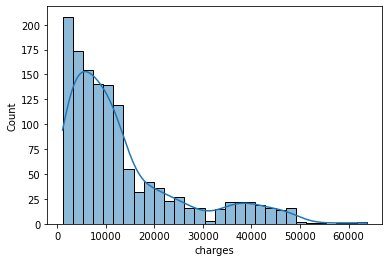

In [15]:
import seaborn as sns
sns.histplot(data['charges'], kde=True, bins=30) 

Question 2

On pourrai supprimer smoker et bmi, qui ne devrai pas influer sur le prix de l'assurance

Question 3

In [26]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges


Donc on a un doublon

Question 4

In [25]:
data.drop(index=581, inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


On a donc supprimer le doublon qui se trouver à l'index 581

# Partie 3 : 

Question 1

In [40]:
(data.groupby('region')['charges'].mean()).sort_values()   
      
(data.groupby('region')['charges'].mean()).mean()  

region
southwest    12346.937377
northwest    12450.840844
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64

In [41]:
(data.groupby('sex')['charges'].mean()).sort_values()
(data.groupby('sex')['charges'].mean()).mean()

13272.288853799153

In [49]:
(data.groupby('smoker')['charges'].mean()).sort_values()
#data['smoker'].value_counts()
#(data.groupby('smoker')['charges'].mean()).mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

On remarque donc ici que le sexe et la région ne sont pas des paramètre qui influe beaucoup, alors que pour les fumeurs on a une moyenne a 20245 qui ne répresente pas l'echantillion car pour 274 fumeur et 1063 non fumeur on a des moyennes respective à 32050 (qui est donc une petite proportion de notre échantillion (1/5)) et 8440 (pour la grande partie de notre échantillion). Ce qui donne au final une moyenne de 20245 alors que on a 4/5 de notre échantillion en dessous des 8500.

Question 2

<AxesSubplot:xlabel='sex', ylabel='charges'>

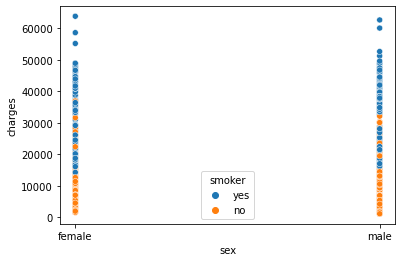

In [101]:
sns.scatterplot(x="sex", y="charges", data=data, hue="smoker")

<AxesSubplot:xlabel='region', ylabel='charges'>

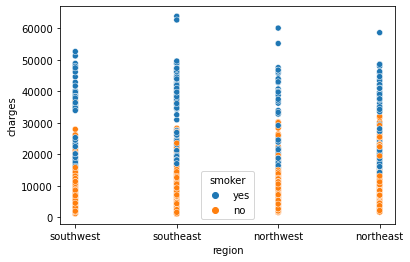

In [102]:
sns.scatterplot(x="region", y="charges", data=data, hue="smoker")

Question 3

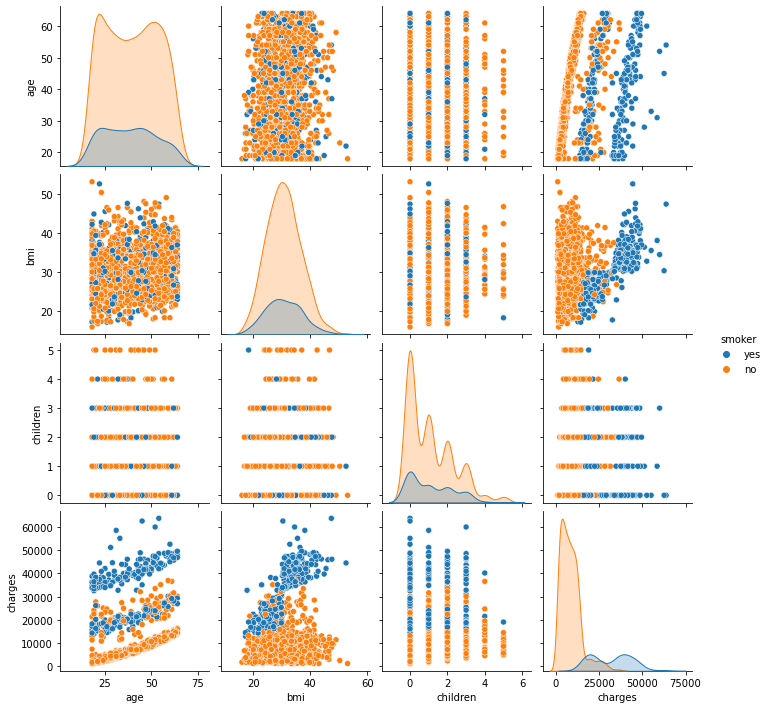

In [81]:
sns.pairplot(data,hue="smoker")

Question 4 :

<AxesSubplot:xlabel='age', ylabel='charges'>

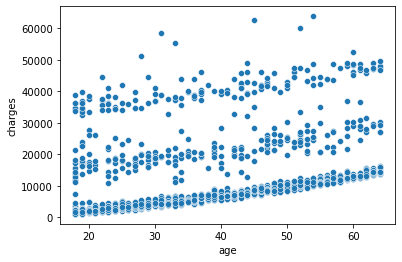

In [105]:
sns.scatterplot(x="age", y="charges", data=data)

On peux en déduire que l'age n'influe pas

<AxesSubplot:xlabel='bmi', ylabel='charges'>

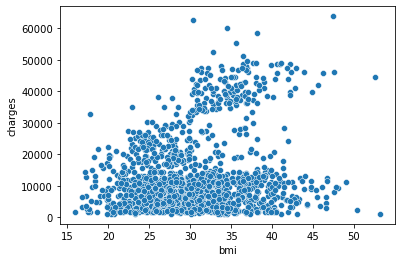

In [108]:
sns.scatterplot(x="bmi", y="charges", data=data)

On peux en déduire que le bmi n'influe pas

# Partie 4 :

Question 1

In [168]:
from sklearn.preprocessing import OrdinalEncoder
transformer = OrdinalEncoder()
data[['sex','region','smoker']] = transformer.fit_transform(data[['sex','region','smoker']])
#data.select_dtypes(include=['object']).columns

In [164]:
transformer.inverse_transform(data[['sex','region','smoker']])

array([[0., 3., 1.],
       [1., 2., 0.],
       [1., 2., 0.],
       ...,
       [0., 2., 0.],
       [0., 3., 0.],
       [0., 1., 1.]])

Question 2

In [169]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


On constate ici que les fumeurs on la plus forte correlation pour les charges

Question 3


In [148]:
data_smokers = data[data["smoker"] == "yes"]
data_smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [149]:
data_smokers.corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


On constate ici que le bmi a la plus forte correlation pour les charges

Question 4

In [256]:
data = pd.get_dummies(data, columns=['region'])
data[['sex','smoker']] = transformer.fit_transform(data[['sex','smoker']])

In [254]:
data

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


# Partie 5 :

Question 1

In [188]:
from sklearn.model_selection import train_test_split
def split_data(X, y, taux=0.8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-taux, random_state=42)
    return X_train, X_test, y_train, y_test
#X data sans Potability, y potability (target)

In [173]:
def nan_value(df):
    return df.dropna()

Question 2

In [258]:
from sklearn.linear_model import LinearRegression
target = "charges"
columns = [x for x in data.columns if x != target]
X_train, X_test, y_train, y_test = split_data(data.drop(target, axis=1), data[target])

In [259]:
model = LinearRegression().fit(X_train, y_train)

In [260]:
model.score(X_train, y_train)

0.7392288307299996

In [261]:
from sklearn.metrics import mean_squared_error
data_predict = model.predict(X_test)
mean_squared_error(data_predict, y_test)

34515553.666804485

Question 3

In [262]:
data_predict

array([ 8.17949231e+03,  7.42637039e+03,  3.73410905e+04,  8.63434290e+03,
        2.73205126e+04,  1.11214302e+04,  5.66444927e+02,  1.72732477e+04,
        1.19552058e+03,  1.03739389e+04,  2.77192389e+04,  8.91887073e+03,
        5.47011515e+03,  3.77293924e+04,  4.08943608e+04,  3.68756527e+04,
        1.49314318e+04,  3.61122132e+04,  9.37741277e+03,  3.18934293e+04,
        2.58440433e+03,  1.00938351e+04,  3.14977391e+03,  6.98878786e+03,
        1.04379132e+04,  1.29641183e+04,  1.53105718e+04,  5.21570470e+03,
        9.16349073e+03,  2.80548770e+03,  8.22898510e+03,  1.34632514e+04,
        5.11840601e+03,  2.58266940e+03,  4.83508596e+03,  1.29646427e+04,
        2.35347977e+03,  9.20308496e+03,  3.33288057e+04,  3.28012393e+04,
        2.55281755e+03,  4.23812692e+03,  1.45014284e+04,  1.19136699e+04,
        8.52798908e+03,  1.25796026e+04,  4.71362342e+03,  2.70561063e+03,
        3.48684833e+04,  8.87095939e+03,  1.64805342e+04,  2.55413077e+03,
        1.21854085e+04,  

In [263]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

<AxesSubplot:ylabel='charges'>

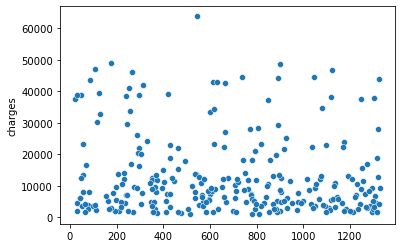

In [264]:
sns.scatterplot(data=y_test)

<AxesSubplot:>

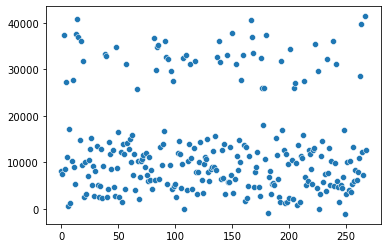

In [265]:
sns.scatterplot(data=data_predict)

On peux voir que notre model à un résultat cohérent avec nos valeurs

Question 4

In [235]:
data = data.drop(['children'], axis=1)

,age,sex,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0.0,27.900,1.0,16884.92400,0,0,0,1
1,18,1.0,33.770,0.0,1725.55230,0,0,1,0
2,28,1.0,33.000,0.0,4449.46200,0,0,1,0
3,33,1.0,22.705,0.0,21984.47061,0,1,0,0
4,32,1.0,28.880,0.0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1.0,30.970,0.0,10600.54830,0,1,0,0
1334,18,0.0,31.920,0.0,2205.98080,1,0,0,0
1335,18,0.0,36.850,0.0,1629.83350,0,0,1,0
1336,21,0.0,25.800,0.0,2007.94500,0,0,0,1


In [253]:
data = data.drop(['children'], axis=1)
data = data.drop(['region'], axis=1)

Les résultats sont similaire si on supprime qui children, par contre on obtiens des différents en supprimant les deux.

Question 5

L'impact serai de trop lissée les données si on en enleve trop. Mais si on en enleve juste assez ça permettrai à notre model de mieux s'entrainer sans inclure les valeurs 'extreme'

# Partie 6 :

Question 1

In [267]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 20, n_jobs = -1, n_estimators = 700)

Question 2-3

In [274]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#param_grid = { 'n_estimators' : np.arange(100, 800, 100)  ,  'max_features' : ['auto', 'sqrt'], 'max_depth' : np.arange(10, 110, 10) , 'min_samples_split' : np.arange(2, 25, 5) }
param_grid = { 'max_depth' : np.arange(1, 25, 10) }
model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
model.best_score_
model.best_params_
bestModel = model.best_estimator_

La meilleur max_depth est à 11

Question 4

In [282]:
bestModel.feature_importances_

RandomForestRegressor(max_depth=11)